Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DIPC_DPPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [3]:
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# select the different species

xmin=0
ymin=0
str_sel= "(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and (name GL1 or name AM1)"
patch = u.select_atoms(str_sel).positions
print(patch)

Lo = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
GM1 = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name AM1").positions
chol = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name ROH").positions


xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[ 26.330002 389.99      69.62    ]
 [ 25.32     276.80002   88.950005]
 [ 46.36     200.64001   83.880005]
 ...
 [130.94     217.27002   59.73    ]
 [259.97003  324.33002   36.190002]
 [175.85     266.41      58.450005]]
431.31
431.34003
0.120000005
0.040000003


In [7]:
# divide the bilayer into 2 leaflets selecting the species you want

Lf = mda.analysis.leaflet.LeafletFinder(u, 'name GL1 or name AM1')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

In [8]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N

In [9]:
#and (name PO4 or name ROH or name AM1)
#and (name PO4 and resname DIPC)

(225, 3)


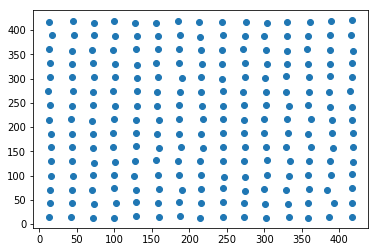

In [40]:
# upper leaflet
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary0 = []
#del Mphi0
Mphi0 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and (name GL1 or name AM1)"
        b0=leaflet0.select_atoms(str_sel).centroid().tolist()
        bary0.append(b0)
        
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        tot0= leaflet0.select_atoms(sel_tot).positions
        n_tot0=len(tot0) # total number of molecules
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Ld0= leaflet0.select_atoms(sel_Ld).positions
        n_Ld0=len(Ld0) # number of molecules in the Lo phase (DPPC here)
        
        phi0=n_Ld0/n_tot0
        Mphi0[i,j]=phi0
        
        
bary0=np.array(bary0)

plt.scatter(bary0[:,0],bary0[:,1])

print(np.shape(bary0))
#print(Mphi0)

(225, 3)


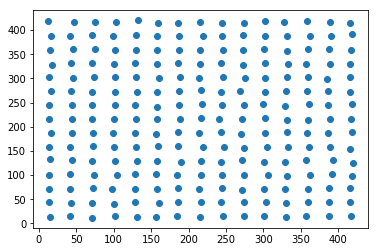

In [48]:
# lower leaflet
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and (name GL1 or name AM1)"
        b1=leaflet1.select_atoms(str_sel).centroid().tolist()
        bary1.append(b1)
        
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        tot1= leaflet1.select_atoms(sel_tot).positions
        n_tot1=len(tot1) # total number of molecules
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules in the Lo phase (DPPC here)
        
        phi1=n_Ld1/n_tot1
        Mphi1[i,j]=phi1
        
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))
#print(Mphi1)

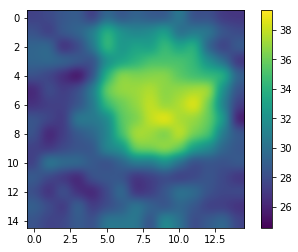

In [49]:
# compute the local thickness = the difference of z between the boxes of the 2 leaflets

bary0.shape=(N,N,3)
bary1.shape=(N,N,3)

diffz=bary0[:,:,2]-bary1[:,:,2]

bary0.shape=(N*N,3)
bary1.shape=(N*N,3)

plt.imshow(diffz, interpolation='gaussian')
plt.colorbar()
#plt.title('Epaisseur de la bicouche',fontsize=12)
plt.savefig(path+'thickness'+name+'.pdf', format='pdf',bbox_inches='tight')

In [50]:
mean_thickness = np.mean(diffz)
max_thickness = np.max(diffz)
min_thickness = np.min(diffz)
print('Mean thickness: %f\n Max thickness: %f\n Min thickness: %f\n' % (mean_thickness, max_thickness, min_thickness))

Mean thickness: 30.571991
 Max thickness: 39.309883
 Min thickness: 24.593498



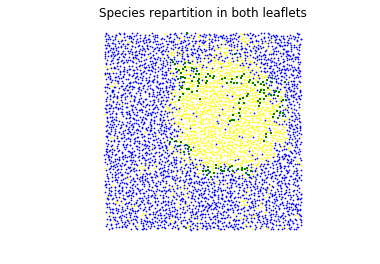

In [51]:
# plot the repartition of the different species

plt.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
plt.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
plt.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=2)
#plt.scatter(tot0[:,1]/N, -tot0[:,0]/N, marker='v', c='orange', s=2)
#plt.scatter(Ld0[:,1]/N, -Ld0[:,0]/N, marker='+', c='pink', s=2)
#plt.scatter(chol[:,1]/N, -chol[:,0]/N, marker='.', c='gray', s=2)

plt.axis('equal')
plt.axis('off')
plt.title('Species repartition in both leaflets',fontsize=12)
plt.savefig(path+'species'+name+'.pdf', format='pdf',bbox_inches='tight')

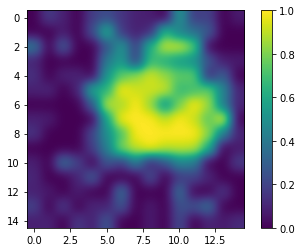

In [52]:
plt.imshow(Mphi0, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-lowerleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

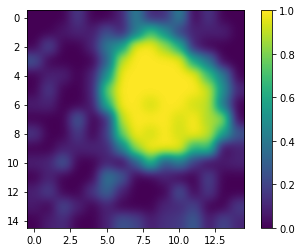

In [54]:
plt.imshow(Mphi1, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-upperleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

In [55]:
print(np.mean(Mphi0))
print(np.mean(Mphi1))

0.29890007523340856
0.3119199689199689


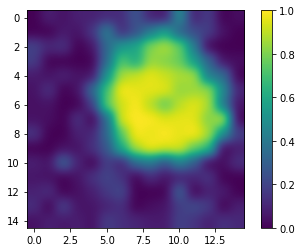

In [57]:
# a voir
Mphi = (Mphi0+Mphi1)/2
plt.imshow(Mphi, interpolation='gaussian')
plt.colorbar()

(-1.5569660062093214,
 30.318301766098642,
 -30.25110041269551,
 1.4988203207687727)

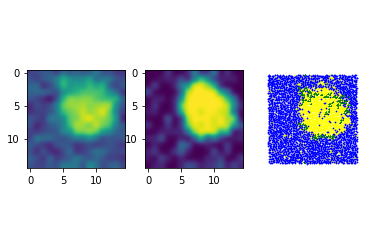

In [58]:
f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(diffz, interpolation='gaussian')
ax2.imshow(Mphi1, interpolation='gaussian')

ax3.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
ax3.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
ax3.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=1)
ax3.axis('equal')
ax3.axis('off')


In [20]:
# create the needed variable to calculate the local curvature

bary=(bary0+bary1)/2 # median leaflet
print(bary0[0,1])
print(bary1[0,1])
print(bary[0,1])

neigh = [0,0,0,0,0]
h=bary[:,2]

13.78700065612793
13.37833309173584
13.582666873931885


In [21]:
# define the function that gives the neighboring

def F_neigh(n) :
    neigh[0] = n
    i=n%N
    j=int(n/N)
    ip1=(i+1)%N
    im1=(i-1)%N
    jp1=(j+1)%N
    jm1=(j-1)%N
    neigh[1] = ip1+N*j
    neigh[2] = im1+N*j
    neigh[3] = i+N*jm1
    neigh[4] = i+N*jp1

In [22]:
# define the function that computes the discrete Laplacian in 2D (with 4 cross neighbors)

def Lap(n) :
    lap = ( h[neigh[4]]+h[neigh[3]]-2*h[neigh[0]] ) / dx**2 + ( h[neigh[1]]+h[neigh[2]]-2*h[neigh[0]] ) / dy**2
    return(lap)

In [23]:
# compute the local curvature in each box of the grid

laplacian = []
for i in range(N*N) :
    F_neigh(i)
    laplacian.append(Lap(i))
    
#print(laplacian)    

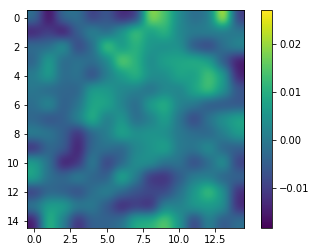

In [24]:
# create a matrix that contains x, y and the local curvature for each box and scatter it

import copy
curv = copy.copy(bary)
#print(curv)
curv[:,2] = laplacian
C = curv[:,2]
C.shape=(N,N)

plt.imshow(-C, interpolation='gaussian')
plt.colorbar()
#plt.title('Local curvature (medial leaflet)',fontsize=12)
plt.savefig(path+'local_curvature'+name+'.pdf', format='pdf',bbox_inches='tight')

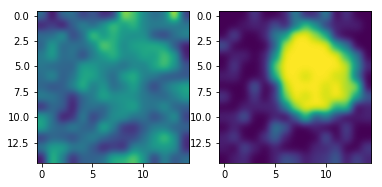

In [59]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(-C, interpolation='gaussian')
ax2.imshow(Mphi1, interpolation='gaussian')

In [26]:
# correlation up-down leaflet composition
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi0[i,j]*Mphi1[i,j] - np.mean(Mphi0)*np.mean(Mphi1) ) / np.std(Mphi0)/np.std(Mphi1)
cov_phi = sum/N**2
print(cov_phi)     

0.8725766801505291


In [27]:
# correlation composition - local thickness
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi[i,j]*diffz[i,j] - np.mean(Mphi)*np.mean(diffz) ) / np.std(Mphi)/np.std(diffz)
cov_e = sum/N**2
print(cov_e)     

-0.9146153888846174


In [28]:
# correlation up-down composition - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*Mphi1[i,j] - np.mean(C)*np.mean(Mphi1) ) / np.std(C)/np.std(Mphi1)
cov_c = sum/N**2
print(cov_c)  

0.36325401023562165


In [29]:
# write these results to a file

file = open(path+'correl'+name+'.txt','w') 
file.write('correlation leaflet up-down: %lf\ncorrelation compo-thickness: %lf\ncorrelation compo-curvature: %lf' % (cov_phi, cov_e, cov_c)) 
file.close() 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1

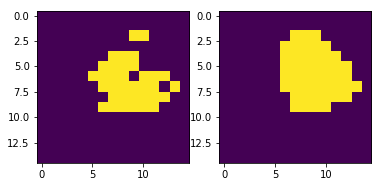

In [77]:
# upper leaflet binary composition

threshold = 0.8 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi0_bin = np.zeros((15,15))
Mphi1_bin = np.zeros((15,15))

for i in range(N):
    for j in range(N):
        if Mphi0[i,j]>= threshold :
            Mphi0_bin[i,j]=1
        if Mphi1[i,j]>= threshold :
            Mphi1_bin[i,j]=1


            
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(Mphi0_bin)
ax2.imshow(Mphi1_bin)

print(Mphi0_bin)
print(Mphi1_bin)

plt.savefig(path+'binary-compo_lower-upper_leaflet'+name+'.pdf', format='pdf',bbox_inches='tight')